<a href="https://colab.research.google.com/github/SaranyaLakshmiMarreddy/IT7103-Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Missing values in the da

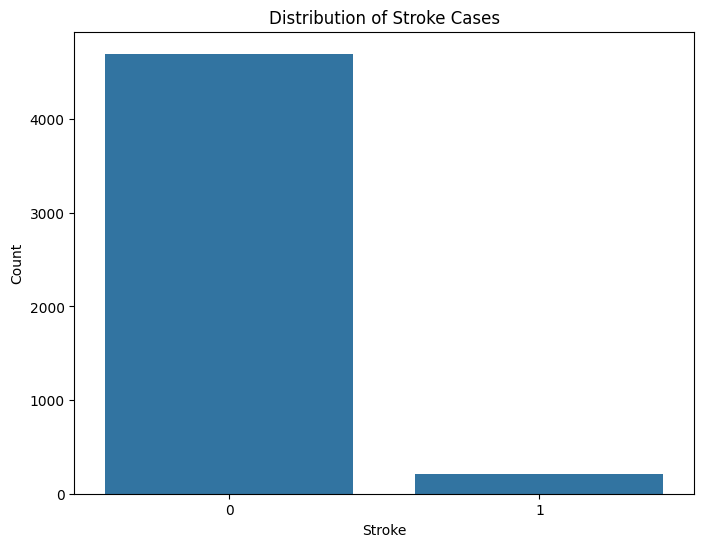

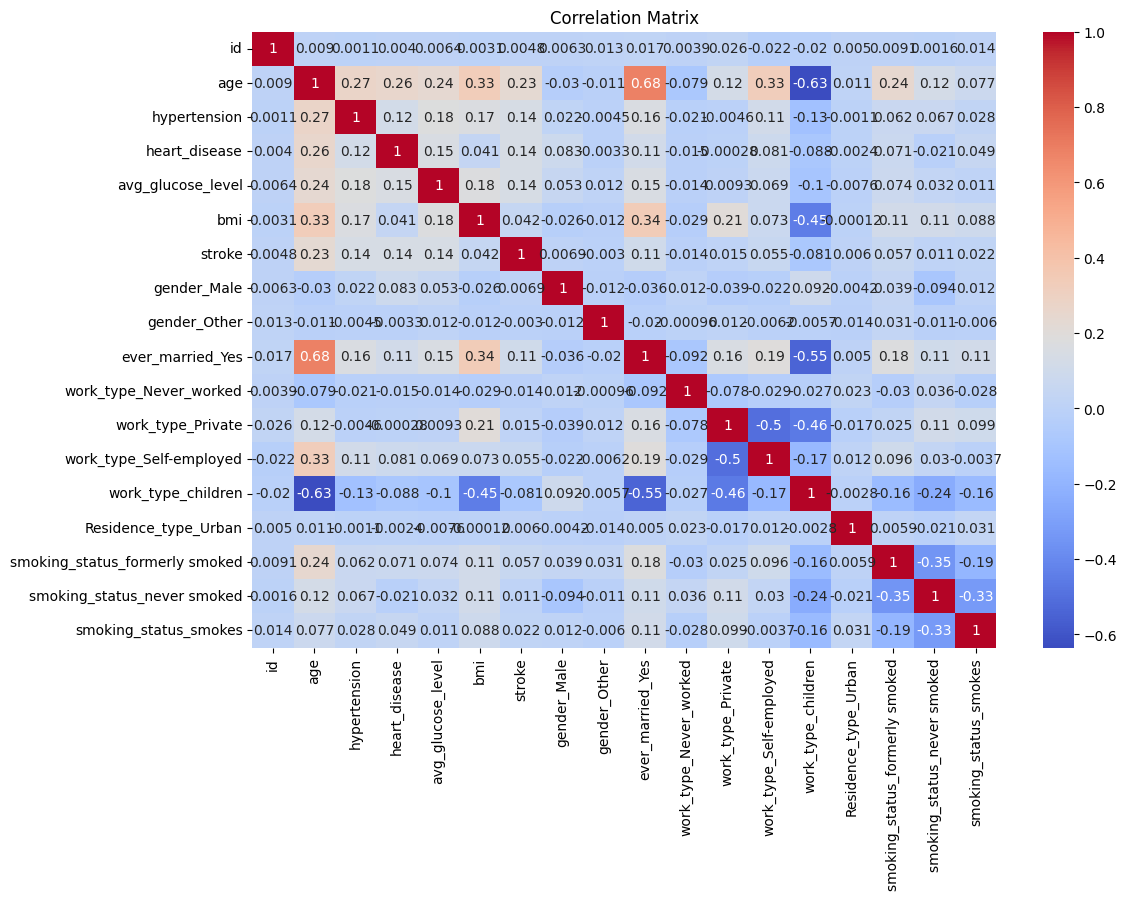

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Model performance metrics:

Logistic Regression:
Accuracy: 0.9521
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

Random Forest:
Accuracy: 0.9562
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000

SVM:
Accuracy: 0.9572
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


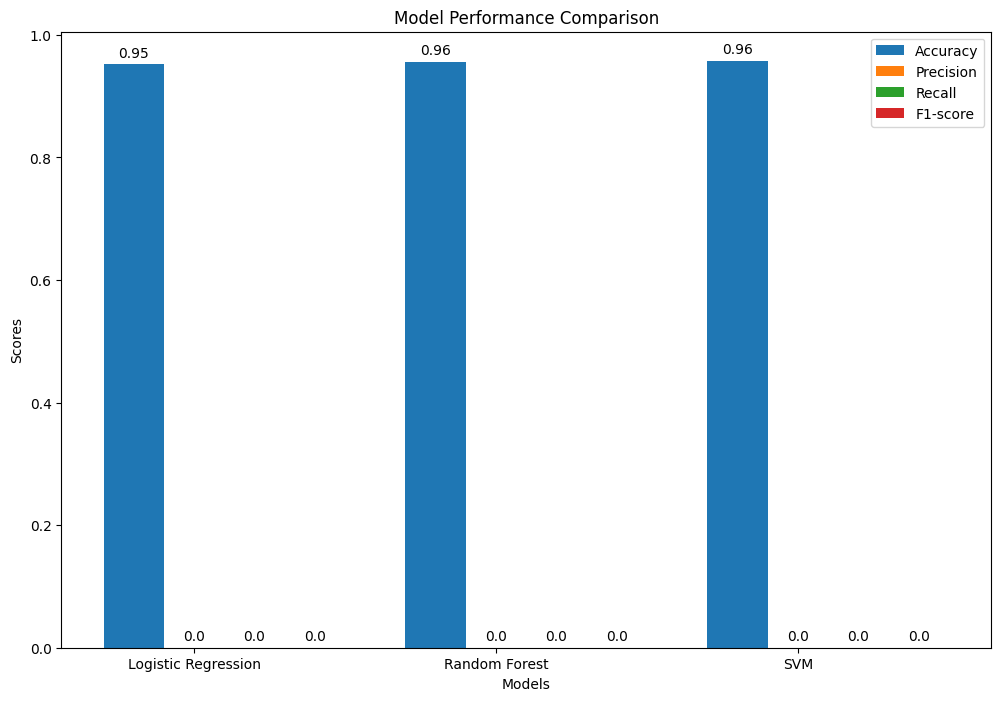

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_url = 'stroke.csv'
stroke_data = pd.read_csv(data_url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(stroke_data.head())

# Check for missing values
missing_values = stroke_data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)

# Fill missing values or drop them
stroke_data.dropna(inplace=True)

# Encode categorical variables
stroke_data = pd.get_dummies(stroke_data, drop_first=True)

# Normalize numerical features if necessary
numerical_features = ['age', 'bmi', 'avg_glucose_level']
scaler = StandardScaler()
stroke_data[numerical_features] = scaler.fit_transform(stroke_data[numerical_features])

# Display the first few rows of the preprocessed dataset
print("\nFirst few rows of the preprocessed dataset:")
print(stroke_data.head())

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=stroke_data)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = stroke_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the data into features and target
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC()

# Train and evaluate each model
models = {'Logistic Regression': log_reg, 'Random Forest': rf_clf, 'SVM': svm_clf}
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Display the results
print("\nModel performance metrics:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

# Extract the metrics from the results dictionary
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = list(results.keys())
metrics_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}

# Plot the metrics for each model
x = np.arange(len(model_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
bars = []

for i, metric in enumerate(metrics):
    bars.append(ax.bar(x + i*width, metrics_values[metric], width, label=metric))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(model_names)
ax.legend()

# Add the values on top of the bars
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()